In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0


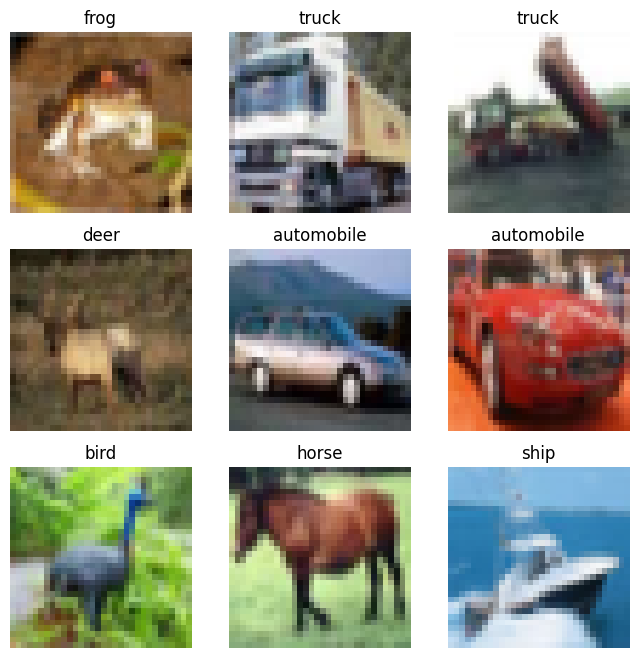

In [11]:

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [13]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same',
                        input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

print(" DONE ✅")


 DONE ✅


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


print("DONE ✅")

DONE ✅


In [23]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=2,
                    validation_data=(x_test, y_test))

Epoch 1/2


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 237ms/step - accuracy: 0.5813 - loss: 1.1870 - val_accuracy: 0.6107 - val_loss: 1.1238
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 235ms/step - accuracy: 0.6148 - loss: 1.1047 - val_accuracy: 0.6918 - val_loss: 0.9087


In [24]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6896 - loss: 0.9053

Test Accuracy: 0.6917999982833862


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


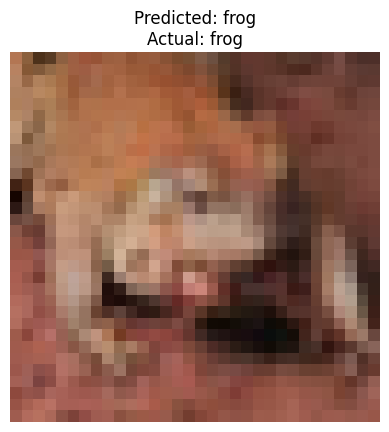

In [25]:
predictions = model.predict(x_test)

index = 5
plt.imshow(x_test[index])
plt.title("Predicted: " + class_names[np.argmax(predictions[index])] +
          "\nActual: " + class_names[y_test[index][0]])
plt.axis('off')
plt.show()

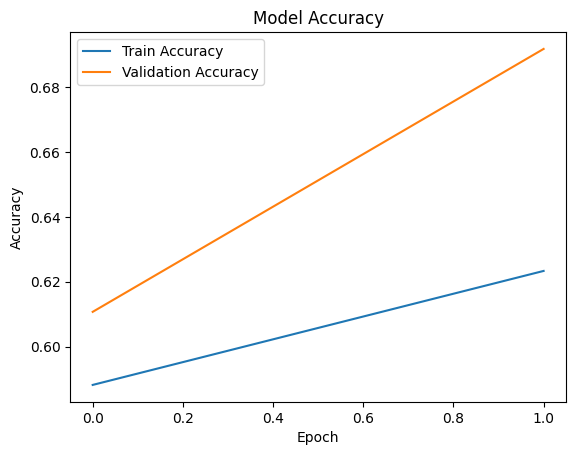

In [26]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()